In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import helper
# from src import helper.py as helper
plt.style.use('ggplot')

**WORLD GDP PER CAPITA**

In [2]:
gdp_pc_df = helper.format_data('../data/gdp_per_capita.csv')

In [3]:
gdp_pc_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.993280,24713.698050,26189.435510,26647.938100,27980.880700,28281.350480,29007.693000,NaN,NaN,NaN
Afghanistan,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,129.108323,129.329713,...,591.162759,641.871479,637.165523,613.856689,578.466353,547.228110,556.302002,524.162881,502.115487,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2973.591160,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5352.857411,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43335.328860,38686.461260,39538.766720,41303.929370,35762.523070,37474.665410,38962.880350,41793.055260,40886.391160,NaN


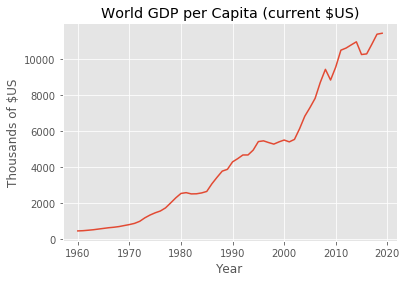

In [5]:
x_data = range(1960, 2021)
y_data = gdp_pc_df.loc['World']

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1) # or 211
ax1.plot(x_data, y_data)
ax1.set_title('World GDP per Capita (current $US)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Thousands of $US')

plt.show()
fig.savefig('world_gdp.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**IMPORTS / EXPORTS**

In [5]:
imports_df = helper.format_data('../data/imports.csv')
exports_df = helper.format_data('../data/exports.csv')

/Users/pete/DS/Capstones/Capstone1/Capstone-1/notebooks/helper.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot(1, 1, 1)


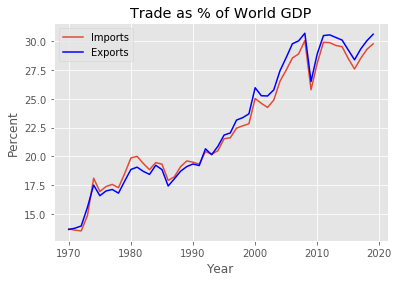

In [6]:
helper.plot_imp_exp(imports_df, exports_df, 'World', df1_label='Imports', df2_label='Exports', title='Trade as % of World GDP')
plt.show()
# fig.savefig('world_trade.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**TOTAL WORLD GDP**

In [7]:
gdp_df = helper.format_data('../data/gdp.csv')
gdp_df.drop(gdp_df.iloc[:, 1:-2], axis=1, inplace=True)

In [10]:
sorted_gdp = gdp_df.loc[country_list]['2019'].sort_values(ascending = False)

world_gdp = gdp_df.loc['World']['2019']

top_sum = sorted_gdp[:5].sum()

In [11]:
gdp_df2 = helper.format_data('../data/gdp.csv')
gdp_df2.drop(gdp_df2.iloc[:, 10:-2], axis=1, inplace=True)

In [ ]:
gdp_df2['GDP Difference'] = gdp_df2['2019'] - gdp_df2['1968']
gdp_df2['% change'] = gdp_df2['GDP Difference'] / gdp_df2['1968']

world_diff = gdp_df2.loc['World']['GDP Difference'] ################
gdp_df2['world %'] = gdp_df2['GDP Difference'] / world_diff

diff = gdp_df2.loc[country_list].sort_values(by='GDP Difference', ascending=False)
reg_diff = gdp_df2.loc[region_list].sort_values(by='GDP Difference', ascending=False)

print(reg_diff.head(10))
print(gdp_df2['% change'])

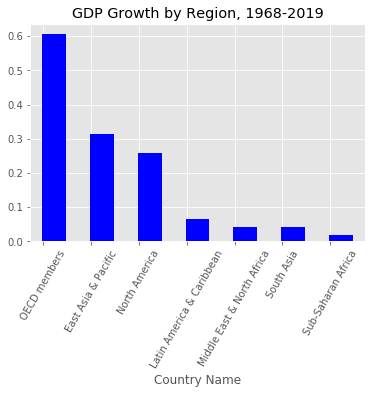

In [13]:
reg_diff['world %'].plot.bar(rot=60, title='GDP Growth by Region, 1968-2019', color='blue', position=.05)
# plt.savefig('region_gdp_growth.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**% GDP FOR TRADE REGIONS**

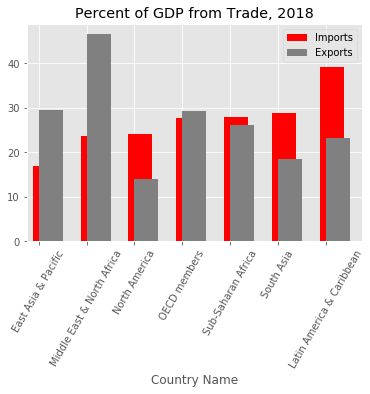

In [14]:
imports_df['I % change'] = ((imports_df['2018'] - imports_df['1970']) / imports_df['2018']) * 100
exports_df['exp % change'] = ((exports_df['2018'] - exports_df['1970']) / exports_df['2018']) * 100

ax = imports_df.loc[region_list]['2018'].sort_values().plot.bar(label = 'Imports', rot=60, title='Percent of GDP from Trade, 2018', color='red', position=.25, stacked=True)
exports_df.loc[region_list]['2018'].plot.bar(label='Exports', rot=60, ax=ax, color='gray', stacked=True, position=.00)
ax.legend()

plt.show()
# plt.savefig('trade_regional.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**GDP SHARE - PIE CHART**

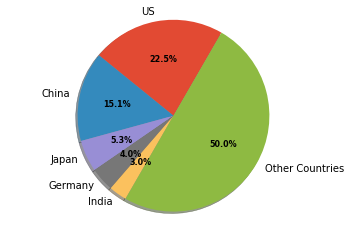

In [15]:
labels = 'US', 'China', 'Japan', 'Germany', 'India', 'Other Countries'
sizes = [sorted_gdp.loc['United States'], sorted_gdp.loc['China'], sorted_gdp.loc['Japan'], sorted_gdp.loc['Germany'], sorted_gdp.loc['India'], top_sum]
fig1, ax1 = plt.subplots()
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60, textprops=dict(color="black"))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.setp(autotexts, size=8, weight='bold')

plt.show()
# fig1.savefig('top_gdp.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**GDP GROWTH RATES**

In [16]:
gdp_growth = helper.format_data('../data/gdp_growth.csv')

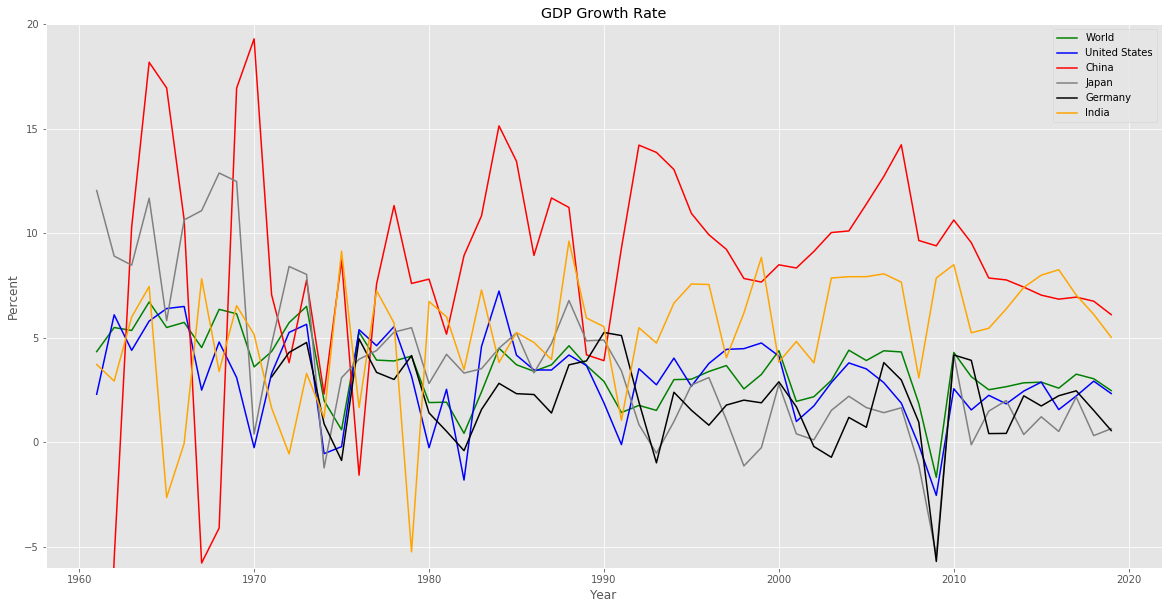

In [17]:
regions = ['World', 'United States', 'China', 'Japan', 'Germany', 'India']
colors = ['green', 'blue', 'red', 'gray', 'black', 'orange']
helper.plot_gdp_growth_rates(gdp_growth, regions, colors, title='GDP Growth Rate')

# fig.savefig('growth_rate.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**IMPORT EXPORT GROWTH RATES**

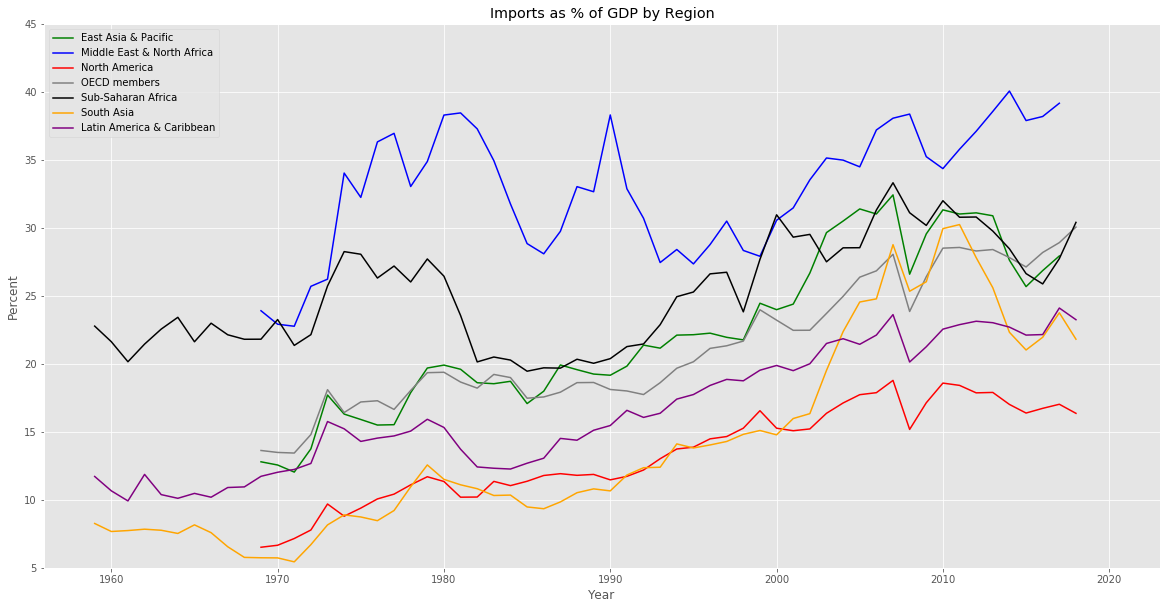

In [18]:
''' Plotting imports and exports by region'''
colors = ['green', 'blue', 'red', 'gray', 'black', 'orange', 'purple']
helper.plot_trade_rates(imports_df, region_list, colors, title='Imports as % of GDP by Region')
# plt.ylim(0, 55)

# fig.savefig('import_rate.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

(0, 55)

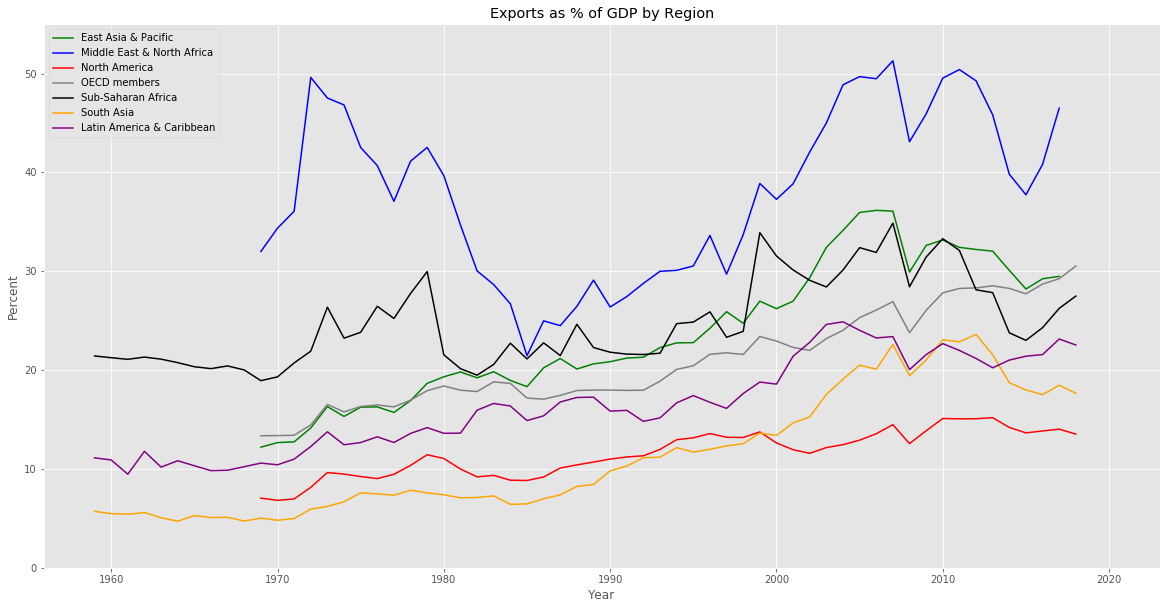

In [19]:
helper.plot_trade_rates(exports_df, region_list, colors, title='Exports as % of GDP by Region')
plt.ylim(0, 55) 

# fig.savefig('export_rate.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**COUNTRY AND REGION LISTS**

In [9]:
country_list = ['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria','Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Channel Islands', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt, Arab Rep.', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faroe Islands', 'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Gibraltar', 'Guinea', 'Gambia, The', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Greenland', 'Guatemala',
       'Guam', 'Guyana', 'Hong Kong SAR, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 
       'Indonesia',  'Isle of Man', 'India', 'Ireland', 'Iran, Islamic Rep.', 'Iraq',
       'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Cambodia', 'Kiribati',
       'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Lao PDR', 'Lebanon', 'Liberia', 'Libya', 'St. Lucia',
       'Liechtenstein', 'Sri Lanka', 'Lesotho', 'Lithuania', 'Luxembourg', 'Latvia', 'Macao SAR, China',
       'St. Martin (French part)', 'Morocco', 'Monaco', 'Moldova', 'Madagascar', 'Maldives', 'Mexico',
       'Marshall Islands', 'North Macedonia', 'Mali', 'Malta', 'Myanmar', 'Montenegro',
       'Mongolia', 'Northern Mariana Islands', 'Mozambique', 'Mauritania', 'Mauritius', 'Malawi', 'Malaysia', 'Namibia',
       'New Caledonia', 'Niger', 'Nigeria', 'Nicaragua', 'Netherlands', 'Norway', 'Nepal', 'Nauru', 'New Zealand',  'Oman',
       'Pakistan', 'Panama', 'Peru', 'Philippines', 'Palau', 'Papua New Guinea', 'Poland', 
       'Puerto Rico', 'Korea, Dem. People’s Rep.', 'Portugal', 'Paraguay', 'West Bank and Gaza',  'French Polynesia', 'Qatar',
       'Romania', 'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Sudan', 'Senegal', 'Singapore', 'Solomon Islands',
       'Sierra Leone', 'El Salvador', 'San Marino', 'Somalia', 'Serbia', 'South Sudan', 'Sao Tome and Principe',
       'Suriname', 'Slovak Republic', 'Slovenia', 'Sweden', 'Eswatini', 'Sint Maarten (Dutch part)', 'Seychelles', 'Syrian Arab Republic',
       'Turks and Caicos Islands', 'Chad', 'Togo', 'Thailand', 'Tajikistan', 'Turkmenistan', 'Timor-Leste',  'Tonga', 
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu', 'Tanzania', 'Uganda', 'Ukraine',
       'Uruguay', 'United States', 'Uzbekistan', 'St. Vincent and the Grenadines', 'Venezuela, RB',
       'British Virgin Islands', 'Virgin Islands (U.S.)', 'Vietnam', 'Vanuatu', 'Samoa', 'Kosovo', 'Yemen, Rep.', 'South Africa', 'Zambia', 'Zimbabwe']

region_list = [ 
       'East Asia & Pacific',
       'Middle East & North Africa',
       'North America',
       'OECD members',
       'Sub-Saharan Africa',
       'South Asia',
       'Latin America & Caribbean'
       ]

**INFERENTIAL LINEAR REGRESSION**

In [ ]:
'''
gdp_df2['% change']
imports_df['I % change']
exports_df['exp % change']
'''

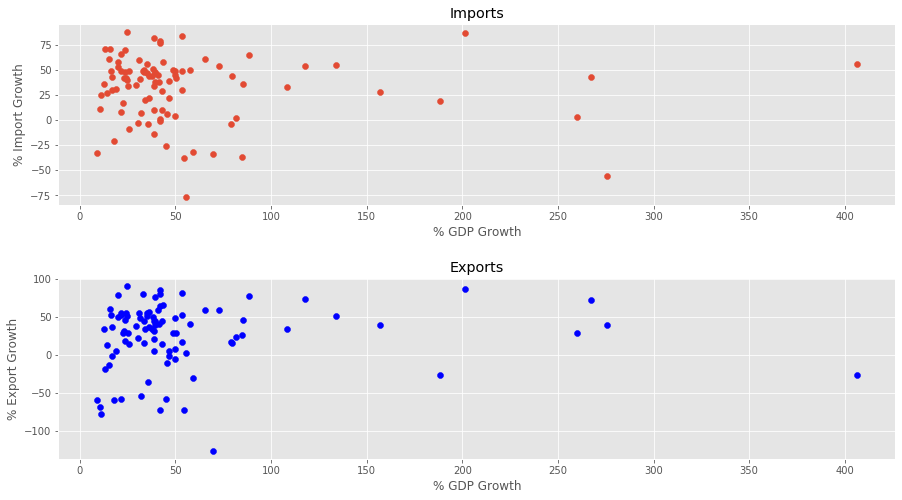

In [20]:
y1 = imports_df['I % change'].loc[country_list]
y2 = exports_df['exp % change'].loc[country_list]
x = gdp_df2['% change'].loc[country_list]

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(x, y1, label='Imports')
ax1.set_xlabel('% GDP Growth')
ax1.set_ylabel('% Import Growth')
ax1.set_title('Imports')

ax2 = fig.add_subplot(2, 1, 2)
ax2.scatter(x, y2, label='Exports', color='blue')
ax2.set_xlabel('% GDP Growth')
ax2.set_ylabel('% Export Growth')
ax2.set_title('Exports')

fig.subplots_adjust(hspace=.4)

# fig.savefig('dual_scatter.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

In [21]:
# print(gdp_df2[gdp_df2['% change']] < 0)
# gdp_df2['% change'].head(100)
gdp_df[gdp_df2['% change'] > 150]

,1960,2019,2020
Country Name,,,
Botswana,3.041231e+07,1.834051e+10,NaN
China,5.971647e+10,1.434290e+13,NaN
East Asia & Pacific (excluding high income),8.025016e+10,1.721440e+13,NaN
Equatorial Guinea,NaN,1.102677e+10,NaN
Indonesia,NaN,1.119190e+12,NaN
"Korea, Rep.",3.958191e+09,1.642380e+12,NaN
Oman,NaN,7.698309e+10,NaN
Saudi Arabia,NaN,7.929670e+11,NaN
Singapore,7.047563e+08,3.720630e+11,NaN


**BEST GRAPH ENTRY**

Text(0.5, 0, 'z')

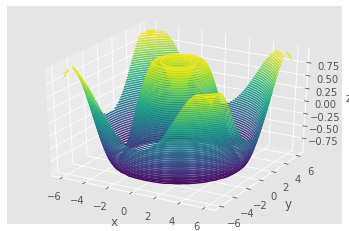

In [22]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# fig.savefig('best_graph.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**INFERENTIAL LINEAR REGRESSION OF TRADE AND GDP GROWTH**

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import statsmodels.api as sm
from glm.glm import GLM
from glm.families import Gaussian, Poisson
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [24]:
gdp = gdp_df2.loc[country_list]
gdp = gdp['% change'].dropna()

imp = imports_df.loc[country_list]
imp = imp['I % change'].dropna()

exp = exports_df.loc[country_list]
exp = exp['exp % change'].dropna()

g_i = pd.merge(gdp, imp, on='Country Name')
g_i_e = pd.merge(g_i, exp, on='Country Name')

In [25]:
#Imports
X = g_i_e['I % change']
X = sm.add_constant(X)
y = g_i_e['% change']

regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               % change   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6171
Date:                Thu, 29 Oct 2020   Prob (F-statistic):              0.434
Time:                        12:38:08   Log-Likelihood:                -522.64
No. Observations:                  94   AIC:                             1049.
Df Residuals:                      92   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.0277      9.264      6.695      0.000      43.628      80.427
I % change    -0.1601      0.204     -0.786      0.434      -0.565       0.245
==============================================================================
Omnibus:                       90.690   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.355
Skew:                           3.258   Prob(JB):                    2.54e-159
Kurtosis:                      15.000   Cond. No.                         64.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

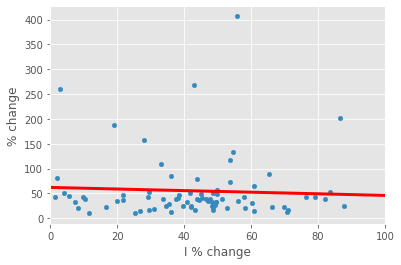

In [26]:
slope = -0.1601
intercept = 62.0277

ax = g_i_e.plot('I % change','% change',kind='scatter')
xx = np.linspace(0, 100, 5)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
_ = ax.set_xlim([0,100])

# plt.savefig('imports_li.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**EXPORTS**

In [27]:
#Exports
X = g_i_e['exp % change']
X = sm.add_constant(X)
y = g_i_e['% change']

regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               % change   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2438
Date:                Thu, 29 Oct 2020   Prob (F-statistic):              0.623
Time:                        12:38:15   Log-Likelihood:                -522.83
No. Observations:                  94   AIC:                             1050.
Df Residuals:                      92   BIC:                             1055.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           55.0431      7.553      7.287      0.000      40.042      70.044
exp % change     0.0752      0.152      0.494      0.623      -0.227       0.378
==============================================================================
Omnibus:                       91.117   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.836
Skew:                           3.276   Prob(JB):                    2.22e-161
Kurtosis:                      15.082   Cond. No.                         57.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
slope = 0.0752
intercept = 55.0431

ax = g_i_e.plot('exp % change','% change',kind='scatter')
xx = np.linspace(-2, 100, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
_ = ax.set_xlim([0,100])

# plt.savefig('exports_li.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

NameError: name 'g_i_e' is not defined

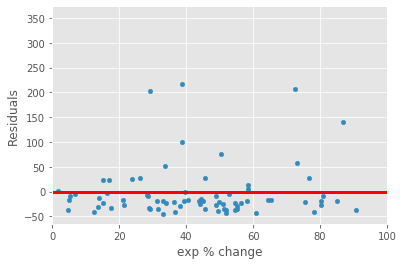

In [29]:
X["y_hat"] = regressor.predict(X)
X["Residuals"] = y - X["y_hat"]
# Plot the line along with the data
ax = X.plot('exp % change','Residuals',kind='scatter')
ax.plot(xx, [0]*100, color='red', lw=3)
_ = ax.set_xlim([0,100])
# plt.savefig('exports_residuals.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

Estimated standard error:  62.99944186559745


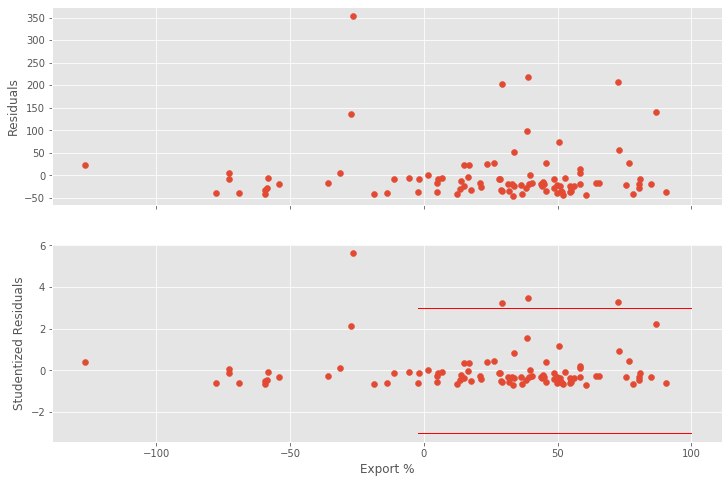

In [30]:
f, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].scatter(X['exp % change'], X['Residuals'])
ax[0].set_ylabel('Residuals')

est_std = np.std(X['Residuals'])
print("Estimated standard error: ", est_std)
X['Studentized Res.'] = X['Residuals']/est_std

ax[1].scatter(X['exp % change'], X['Studentized Res.'])
ax[1].plot(xx, [3]*100, color='red', lw=1)
ax[1].plot(xx, [-3]*100, color='red', lw=1)
ax[1].set_xlabel('Export %')
ax[1].set_ylabel('Studentized Residuals')
fig.show()
# plt.savefig('exports_resid_+_student.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

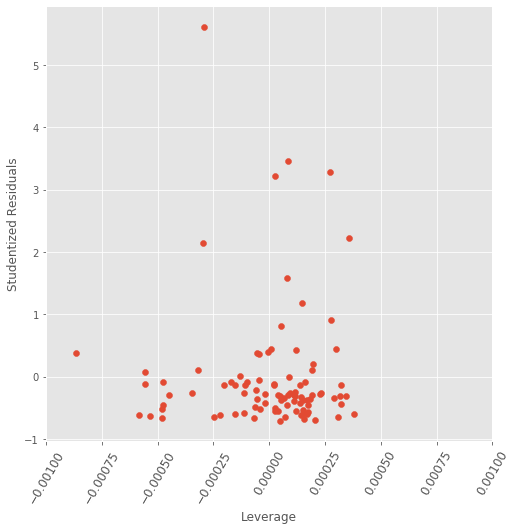

In [31]:
#Create leverage column
X['ave_exp_%'] = np.mean(X['exp % change'])
X['exp_%_centered'] = X['exp % change'] - X['ave_exp_%']
X['sq_centered'] = X['exp_%_centered']*X['exp_%_centered']
ss_wc = np.sum(X['sq_centered'])
X['leverage'] = X['exp_%_centered']/ss_wc

#plot
f, ax = plt.subplots(figsize=(8,8))
ax.scatter(X['leverage'],X['Studentized Res.'])
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')
ax.set_xlim(-.001, .001)
#ax.xticks(x, labels, rotation='vertical')
ax.tick_params(axis='x', which='major', labelsize=12, rotation=60)
# plt.savefig('exports_studentized_residuals.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

**DROP OUTLIERS**

In [32]:
g_i_e[g_i_e['% change'] > 125]

,% change,I % change,exp % change
Country Name,,,
Botswana,275.845184,-55.510886,38.877174
China,201.450268,86.585089,86.963466
"Hong Kong SAR, China",133.720205,54.667820,50.526512
Indonesia,157.156644,28.104757,38.755597
"Korea, Rep.",267.394133,42.958641,72.523048
Oman,406.609348,55.838979,-26.486547
Saudi Arabia,188.352696,19.125395,-27.311726
Singapore,259.965827,2.829429,29.072123


In [33]:
gie_no_outlier = g_i_e.drop(['Botswana', 'China', 'Oman', 'Indonesia','Korea, Rep.', 'Saudi Arabia', 'Singapore'])
gie_no_outlier[gie_no_outlier['% change'] > 100]

,% change,I % change,exp % change
Country Name,,,
"Hong Kong SAR, China",133.720205,54.667820,50.526512
Ireland,117.556957,53.708811,72.980248
Malaysia,108.507186,33.076526,33.741607


In [34]:
# Imports
X = gie_no_outlier['I % change']
X = sm.add_constant(X)
y = gie_no_outlier['% change']

regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               % change   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7616
Date:                Thu, 29 Oct 2020   Prob (F-statistic):              0.385
Time:                        12:38:28   Log-Likelihood:                -398.40
No. Observations:                  87   AIC:                             800.8
Df Residuals:                      85   BIC:                             805.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6017      3.700     11.785      0.000      36.246      50.957
I % change    -0.0715      0.082     -0.873      0.385      -0.234       0.091
==============================================================================
Omnibus:                       35.056   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.884
Skew:                           1.541   Prob(JB):                     6.68e-16
Kurtosis:                       6.128   Cond. No.                         65.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

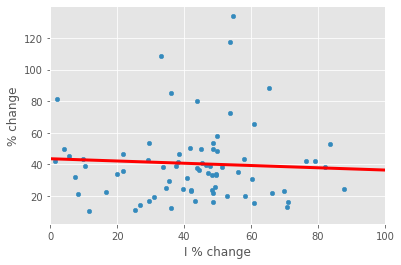

In [35]:
slope = -0.0715
intercept = 43.6017

ax = gie_no_outlier.plot('I % change','% change',kind='scatter')
xx = np.linspace(0, 100, 5)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
_ = ax.set_xlim([0,100])

plt.savefig('imports_li_no_outliers.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

In [36]:
# Exports
X = gie_no_outlier['exp % change']
X = sm.add_constant(X)
y = gie_no_outlier['% change']

regressor = sm.OLS(y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               % change   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.700
Date:                Thu, 29 Oct 2020   Prob (F-statistic):              0.196
Time:                        12:38:31   Log-Likelihood:                -397.93
No. Observations:                  87   AIC:                             799.9
Df Residuals:                      85   BIC:                             804.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.4278      2.909     13.552      0.000      33.643      45.212
exp % change     0.0767      0.059      1.304      0.196      -0.040       0.194
==============================================================================
Omnibus:                       30.973   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.391
Skew:                           1.465   Prob(JB):                     4.20e-12
Kurtosis:                       5.424   Cond. No.                         56.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

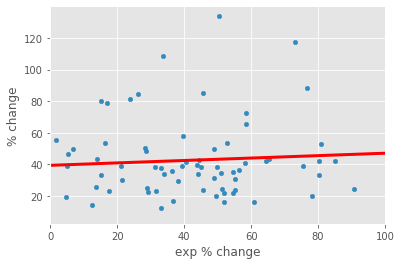

In [37]:
slope = 0.0767
intercept = 39.4278

ax = gie_no_outlier.plot('exp % change','% change',kind='scatter')
xx = np.linspace(-2, 100, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
_ = ax.set_xlim([0,100])

plt.savefig('exports_li_no_outliers.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

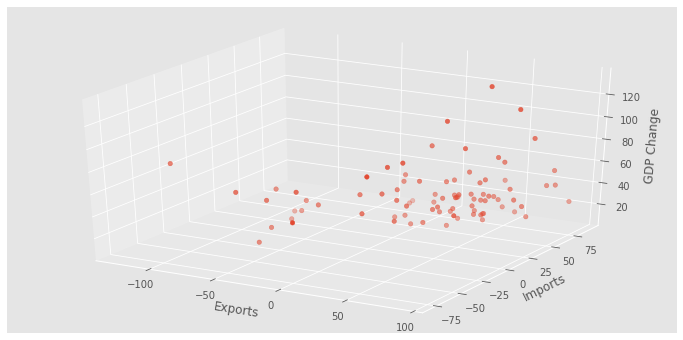

In [40]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gie_no_outlier['exp % change'], gie_no_outlier['I % change'], gie_no_outlier['% change'])
ax.set_zlabel('GDP Change')
ax.set_xlabel('Exports')
ax.set_ylabel('Imports');

In [41]:
y = gie_no_outlier['% change']
X = sm.add_constant(gie_no_outlier[['exp % change','I % change']])
X.head()

,const,exp % change,I % change
Country Name,,,
Afghanistan,1.0,-18.446278,70.850686
Argentina,1.0,60.774764,71.157746
Australia,1.0,40.499558,38.197403
Austria,1.0,50.871963,47.210632
Burundi,1.0,-13.697835,61.015070


In [42]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               % change   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     3.947
Date:                Thu, 29 Oct 2020   Prob (F-statistic):             0.0230
Time:                        12:41:08   Log-Likelihood:                -394.88
No. Observations:                  87   AIC:                             795.8
Df Residuals:                      84   BIC:                             803.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.9771      3.611     12.455      0.000      37.796      52.158
exp % change     0.2068      0.078      2.660      0.009       0.052       0.361
I % change      -0.2657      0.108     -2.468      0.016      -0.480      -0.052
==============================================================================
Omnibus:                       36.740   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.232
Skew:                           1.607   Prob(JB):                     4.61e-17
Kurtosis:                       6.229   Cond. No.                         92.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

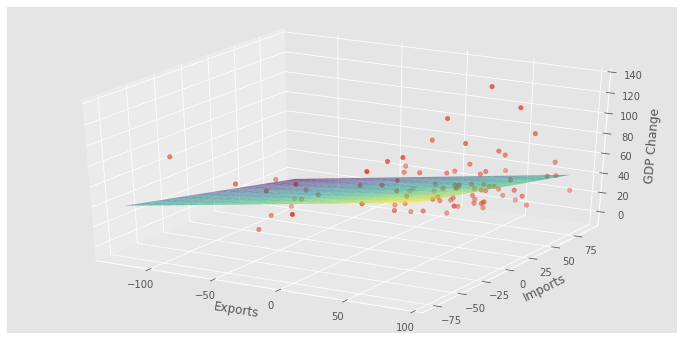

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gie_no_outlier['exp % change'], gie_no_outlier['I % change'], gie_no_outlier['% change']);
ax.set_zlabel('GDP Change')
ax.set_xlabel('Exports')
ax.set_ylabel('Imports');

xx1 = np.linspace(gie_no_outlier['exp % change'].min(), gie_no_outlier['exp % change'].max(), 20)
xx2 = np.linspace(gie_no_outlier['I % change'].min(), gie_no_outlier['I % change'].max(), 20)
xx1, xx2 = np.meshgrid(xx1, xx2)
best_plane = (results.params['const'] +
              results.params['exp % change']*xx1 +
              results.params['I % change']*xx2)

# Plot the surface.
surf = ax.plot_surface(xx1, xx2, best_plane, color='k', alpha=.6, cmap='viridis')

# fig.savefig('best_graph2.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)